In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
%pip install -qr requirements.txt # install dependencies
%pip install -q roboflow

import torch
import os
from IPython.display import Image, clear_output  # to display images

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Cloning into 'yolov5'...
remote: Enumerating objects: 16491, done.
remote: Counting objects: 100% (83/83), done.
remote: Compressing objects: 100% (74/74), done.
remote: Total 16491 (delta 27), reused 36 (delta 9), pack-reused 16408
Receiving objects: 100% (16491/16491), 15.17 MiB | 9.81 MiB/s, done.
Resolving deltas: 100% (11290/11290), done.
/content/yolov5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 716.3/716.3 kB 23.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.2/70.2 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 18.6 MB/s

In [ ]:
%cd content/drive/My Drive/saveYolo

Put data.yaml file similar to yolov8 file structure in concent the file of colab in the location provided below

In [ ]:
!python train.py --img 600 --batch 16 --epoch 100 --data /content/yolov5/data/custom.yaml --weights yolov5s.pt --cache

2024-03-01 03:22:34.766011: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-01 03:22:34.766061: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-01 03:22:34.767401: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=, data=/content/yolov5/data/custom.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=600, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, 

In [ ]:
!python detect.py --weights /content/gdrive/MyDrive/data/runs/train/exp/weights/best.pt --img 608 --conf 0.1 --source /content/IMG0000019.jpg

detect: weights=['/content/gdrive/MyDrive/data/runs/train/exp/weights/best.pt'], source=/content/IMG0000019.jpg, data=data/coco128.yaml, imgsz=[608, 608], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-287-g574331f9 Python-3.10.12 torch-2.1.0+cu121 CPU

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/IMG0000019.jpg: 608x512 1 fractured, 503.7ms
Speed: 3.7ms pre-process, 503.7ms inference, 32.0ms NMS per image at shape (1, 3, 608, 608)
Results saved to runs/detect/exp


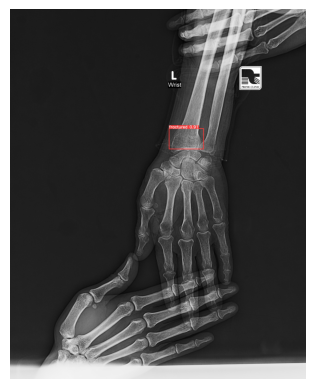

In [ ]:
# Import libraries
import cv2
from matplotlib import pyplot as plt

# Load the image (replace "path/to/your/image.jpg" with your actual image path)
img = cv2.imread("/content/yolov5/runs/detect/exp/IMG0000019.jpg")

# Check if image loaded successfully
if img is None:
  print("Error: Image not found or unable to load.")
else:
  # Convert BGR (OpenCV format) to RGB (Matplotlib format)
  rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

  # Display the image
  plt.imshow(rgb_img)
  plt.axis('off')  # Hide axes for cleaner display
  plt.show()
